In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import pickle

# end to end toy project
<i>using <b>placement.csv</b> dataset</i>

In [2]:
# data set
data = pd.read_csv('placement.csv')
data

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


## steps
### 1. preprocess + EDA + feature selection
### 2. extract input and output columns
### 3. scale the value
### 4. train test split
### 5. train the model
### 6. evaluate the model/model selection
### 7. deploy the model

## 1. preprocess + eda + feature selection

In [3]:
# we dont need the unamed col at the start
data = data.iloc[:,1:]
data

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


<Axes: xlabel='cgpa', ylabel='iq'>

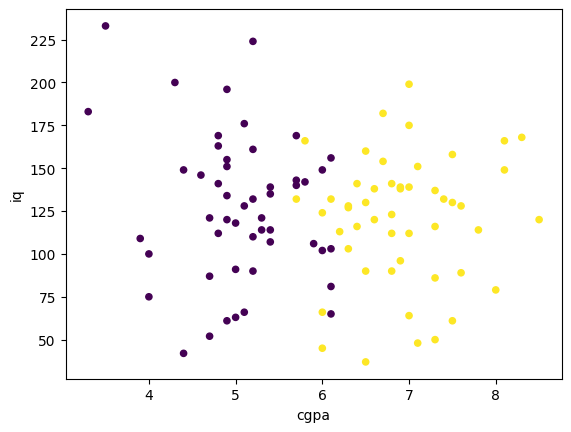

In [4]:
data.plot(x='cgpa', y='iq', kind='scatter',color=data['placement']==1)
# plt.scatter(x=data['cgpa'], y=data['iq'], c=data['placement']);plt.show()

## 2. extract input and output columns

In [5]:
# input 
X = data.iloc[:,0:2]
# output
y = data.iloc[:,2:]
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


## 4. train test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 3. scale the value

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [8]:
X_test = scaler.transform(X_test)

## 5. train the model

In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## 6. evaluate the model/model selection

In [15]:
y_pred = lr.predict(X_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [11]:
score = accuracy_score(y_test, y_pred)
print(f"model accuracy: {score*100}%")

model accuracy: 93.33333333333333%


<Axes: >

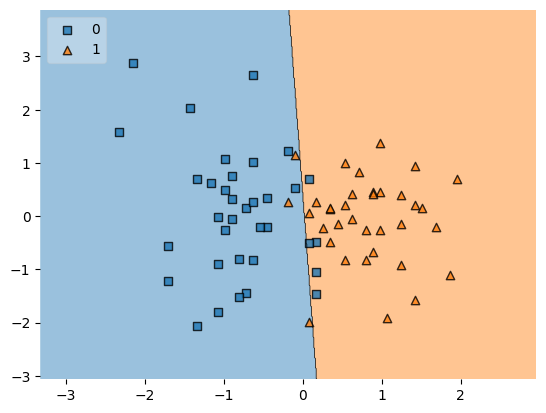

In [12]:
plot_decision_regions(X_train, y_train['placement'].values, clf=lr, legend=2)

## 7. deploy the model

In [14]:
pickle.dump(lr, open('placementpred.pkl', 'wb'))

## heroku, aws, gcp